<center><h1>Payapulli_Joshua_HW6</h1></center>

Name: Joshua Payapulli
<br>
Github Username: Payapulli
<br>
USC ID: 3751786221

I am using 2 late days for this lab.

## 1. Tree-Based Methods

Import packages

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from IPython.display import Image

### (a) Download the APS Failure data

In [2]:
# skip first 20 rows as this is not relevant
train_data = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20, na_values='na')
test_data = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20, na_values='na')

print("Training data: \n")
train_data

Training data: 



class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2       neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286     NaN  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292     NaN  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

In [3]:
print("Testing data: \n")
test_data

Testing data: 



class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg      60     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
1       neg      82     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
2       neg   66002     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
3       neg   59816     NaN  1.010000e+03   936.0     0.0     0.0     0.0   
4       neg    1814     NaN  1.560000e+02   140.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
15995   neg   81852     NaN  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636     NaN  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110     NaN  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006  \
0         0.0     0.0  ...    1098.0     138.0     412.0     654.0       78.0   
1         0.0     0.0  ...    1068.0     276.0    1620.0     116.0       86.0   
2         0.0     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0   
3         0.0     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0   
4         0.0     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0   
...       ...     ...  ...       ...       ...       ...       ...        ...   
15995     0.0     0.0  ...  632658.0  273242.0  510354.0  373918.0   349840.0   
15996     0.0     0.0  ...     266.0      44.0      46.0      14.0        2.0   
15997     0.0     0.0  ...  806832.0  449962.0  778826.0  581558.0   375498.0   
15998     0.0     0.0  ...     588.0     210.0     180.0     544.0     1004.0   
15999     0.0     0.0  ...      46.0      10.0      48.0      14.0       42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
0          88.0       0.0      0.0     0.0     0.0  
1         462.0       0.0      0.0     0.0     0.0  
2      153680.0     516.0      0.0     0.0     0.0  
3      210074.0  281662.0   3232.0     0.0     0.0  
4         482.0      76.0      0.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
15995  317840.0  960024.0  25566.0     0.0     0.0  
15996       0.0       0.0      0.0     0.0     0.0  
15997  222866.0  358934.0  19548.0     0.0     0.0  
15998    1338.0      74.0      0.0     0.0     0.0  
15999      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 171 columns]

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

Some techniques for dealing with data with missing values include:

- Mean/Median/Mode Imputation.
- KNN Imputation.
- Linear Interpolation - missing values calculated based on adjacent values.
- Model-based Imputation/Missing Value Prediction - training a model to predict missing values.

I will be using Mean Imputation.

In [4]:
# Set up the SimpleImputer
imputer = SimpleImputer(strategy='mean')

# skip first column as this is categorical, train only on traning data
imputer.fit(train_data.iloc[:,1:])

# impute data
train_features_imputed = imputer.transform(train_data.iloc[:,1:])
test_features_imputed = imputer.transform(test_data.iloc[:,1:])

# convert back into dataframe
train_features_imputed = pd.DataFrame(train_features_imputed, columns=train_data.iloc[:,1:].columns)
test_features_imputed = pd.DataFrame(test_features_imputed, columns=test_data.iloc[:,1:].columns)

# You can also check if there are any remaining missing values
if train_features_imputed.isnull().sum().sum() == 0:
    print("All missing values have been imputed!")
else:
    print("There are still missing values!")

All missing values have been imputed!


In [5]:
train_features_imputed

aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0       76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1       33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2       41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3          12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4       60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...         ...       ...           ...            ...     ...     ...   
59995  153002.0  0.713189  6.640000e+02     186.000000     0.0     0.0   
59996    2286.0  0.713189  2.130707e+09     224.000000     0.0     0.0   
59997     112.0  0.000000  2.130706e+09      18.000000     0.0     0.0   
59998   80292.0  0.713189  2.130706e+09     494.000000     0.0     0.0   
59999   40222.0  0.713189  6.980000e+02     628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ag_003  ...     ee_002    ee_003     ee_004  \
0         0.0     0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   
1         0.0     0.0     0.0     0.0  ...   421400.0  178064.0   293306.0   
2         0.0     0.0     0.0     0.0  ...   277378.0  159812.0   423992.0   
3         0.0     0.0     0.0   318.0  ...      240.0      46.0       58.0   
4         0.0     0.0     0.0     0.0  ...   622012.0  229790.0   405298.0   
...       ...     ...     ...     ...  ...        ...       ...        ...   
59995     0.0     0.0     0.0  2564.0  ...   998500.0  566884.0  1290398.0   
59996     0.0     0.0     0.0     0.0  ...    10578.0    6760.0    21126.0   
59997     0.0     0.0     0.0     0.0  ...      792.0     386.0      452.0   
59998     0.0     0.0     0.0     0.0  ...   699352.0  222654.0   347378.0   
59999     0.0     0.0     0.0     0.0  ...   440066.0  183200.0   344546.0   

          ee_005     ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       469792.0   339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       245416.0   133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       409564.0   320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           44.0       10.0       0.0       0.0       0.0     4.0    32.0  
4       347188.0   286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...        ...       ...       ...       ...     ...     ...  
59995  1218244.0  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996    68424.0      136.0       0.0       0.0       0.0     0.0     0.0  
59997      144.0      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   225724.0   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   254068.0   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 170 columns]

In [6]:
test_features_imputed

aa_000    ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0         60.0  0.000000  2.000000e+01    12.0     0.0     0.0     0.0   
1         82.0  0.000000  6.800000e+01    40.0     0.0     0.0     0.0   
2      66002.0  2.000000  2.120000e+02   112.0     0.0     0.0     0.0   
3      59816.0  0.713189  1.010000e+03   936.0     0.0     0.0     0.0   
4       1814.0  0.713189  1.560000e+02   140.0     0.0     0.0     0.0   
...        ...       ...           ...     ...     ...     ...     ...   
15995  81852.0  0.713189  2.130706e+09   892.0     0.0     0.0     0.0   
15996     18.0  0.000000  5.200000e+01    46.0     8.0    26.0     0.0   
15997  79636.0  0.713189  1.670000e+03  1518.0     0.0     0.0     0.0   
15998    110.0  0.713189  3.600000e+01    32.0     0.0     0.0     0.0   
15999      8.0  0.000000  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002    ag_003  ...    ee_002    ee_003    ee_004    ee_005  \
0         0.0     0.0    2682.0  ...    1098.0     138.0     412.0     654.0   
1         0.0     0.0       0.0  ...    1068.0     276.0    1620.0     116.0   
2         0.0     0.0  199486.0  ...  495076.0  380368.0  440134.0  269556.0   
3         0.0     0.0       0.0  ...  540820.0  243270.0  483302.0  485332.0   
4         0.0     0.0       0.0  ...    7646.0    4144.0   18466.0   49782.0   
...       ...     ...       ...  ...       ...       ...       ...       ...   
15995     0.0     0.0       0.0  ...  632658.0  273242.0  510354.0  373918.0   
15996     0.0     0.0       0.0  ...     266.0      44.0      46.0      14.0   
15997     0.0     0.0       0.0  ...  806832.0  449962.0  778826.0  581558.0   
15998     0.0     0.0       0.0  ...     588.0     210.0     180.0     544.0   
15999     0.0     0.0       0.0  ...      46.0      10.0      48.0      14.0   

          ee_006    ee_007    ee_008   ee_009  ef_000  eg_000  
0           78.0      88.0       0.0      0.0     0.0     0.0  
1           86.0     462.0       0.0      0.0     0.0     0.0  
2      1315022.0  153680.0     516.0      0.0     0.0     0.0  
3       431376.0  210074.0  281662.0   3232.0     0.0     0.0  
4         3176.0     482.0      76.0      0.0     0.0     0.0  
...          ...       ...       ...      ...     ...     ...  
15995   349840.0  317840.0  960024.0  25566.0     0.0     0.0  
15996        2.0       0.0       0.0      0.0     0.0     0.0  
15997   375498.0  222866.0  358934.0  19548.0     0.0     0.0  
15998     1004.0    1338.0      74.0      0.0     0.0     0.0  
15999       42.0      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 170 columns]

#### (ii) Calculate the coefficient of variation

We are calculating the CV for only training data and not test data, to avoid data leakage and not underestimate our test error. If we use insights from the test dataset to decide aspects of our model selection this will likely lead to an underestimate of our model's performance on test data.

In [7]:
cv_train_df = train_features_imputed.describe()

# calculate Coefficient of Variation (CV) for each column
cv_train_df.loc['CV'] = cv_train_df.loc['std'] / cv_train_df.loc['mean']

# isolate CV col
cv_train_df = cv_train_df.loc[['CV']]

# checking we had no zero division, and our CV df has all valid entries
inf_values = cv_train_df.loc['CV'].apply(np.isinf)
nan_values = cv_train_df.loc['CV'].isna()
if not inf_values.any() and not nan_values.any():
    print("No infinites, no NaNs.")
else:
    print("There are infinites or NaNs.")


print("\nTraining features - coefficients of variation\n")

cv_train_df = cv_train_df.T
cv_train_df

No infinites, no NaNs.

Training features - coefficients of variation



CV
aa_000    2.450938
ab_000    2.328400
ac_000    2.169767
ad_000  183.847620
ae_000   23.190937
...            ...
ee_007    4.962483
ee_008    3.222010
ee_009    5.626979
ef_000   47.124953
eg_000   40.553250

[170 rows x 1 columns]

#### (iii) Plot a correlation matrix

I am plotting the correlation matrix (and the following graphs, charts etc.) on only the training data to avoid data leakage and not produce an underestimate of my model's performance on the test data.

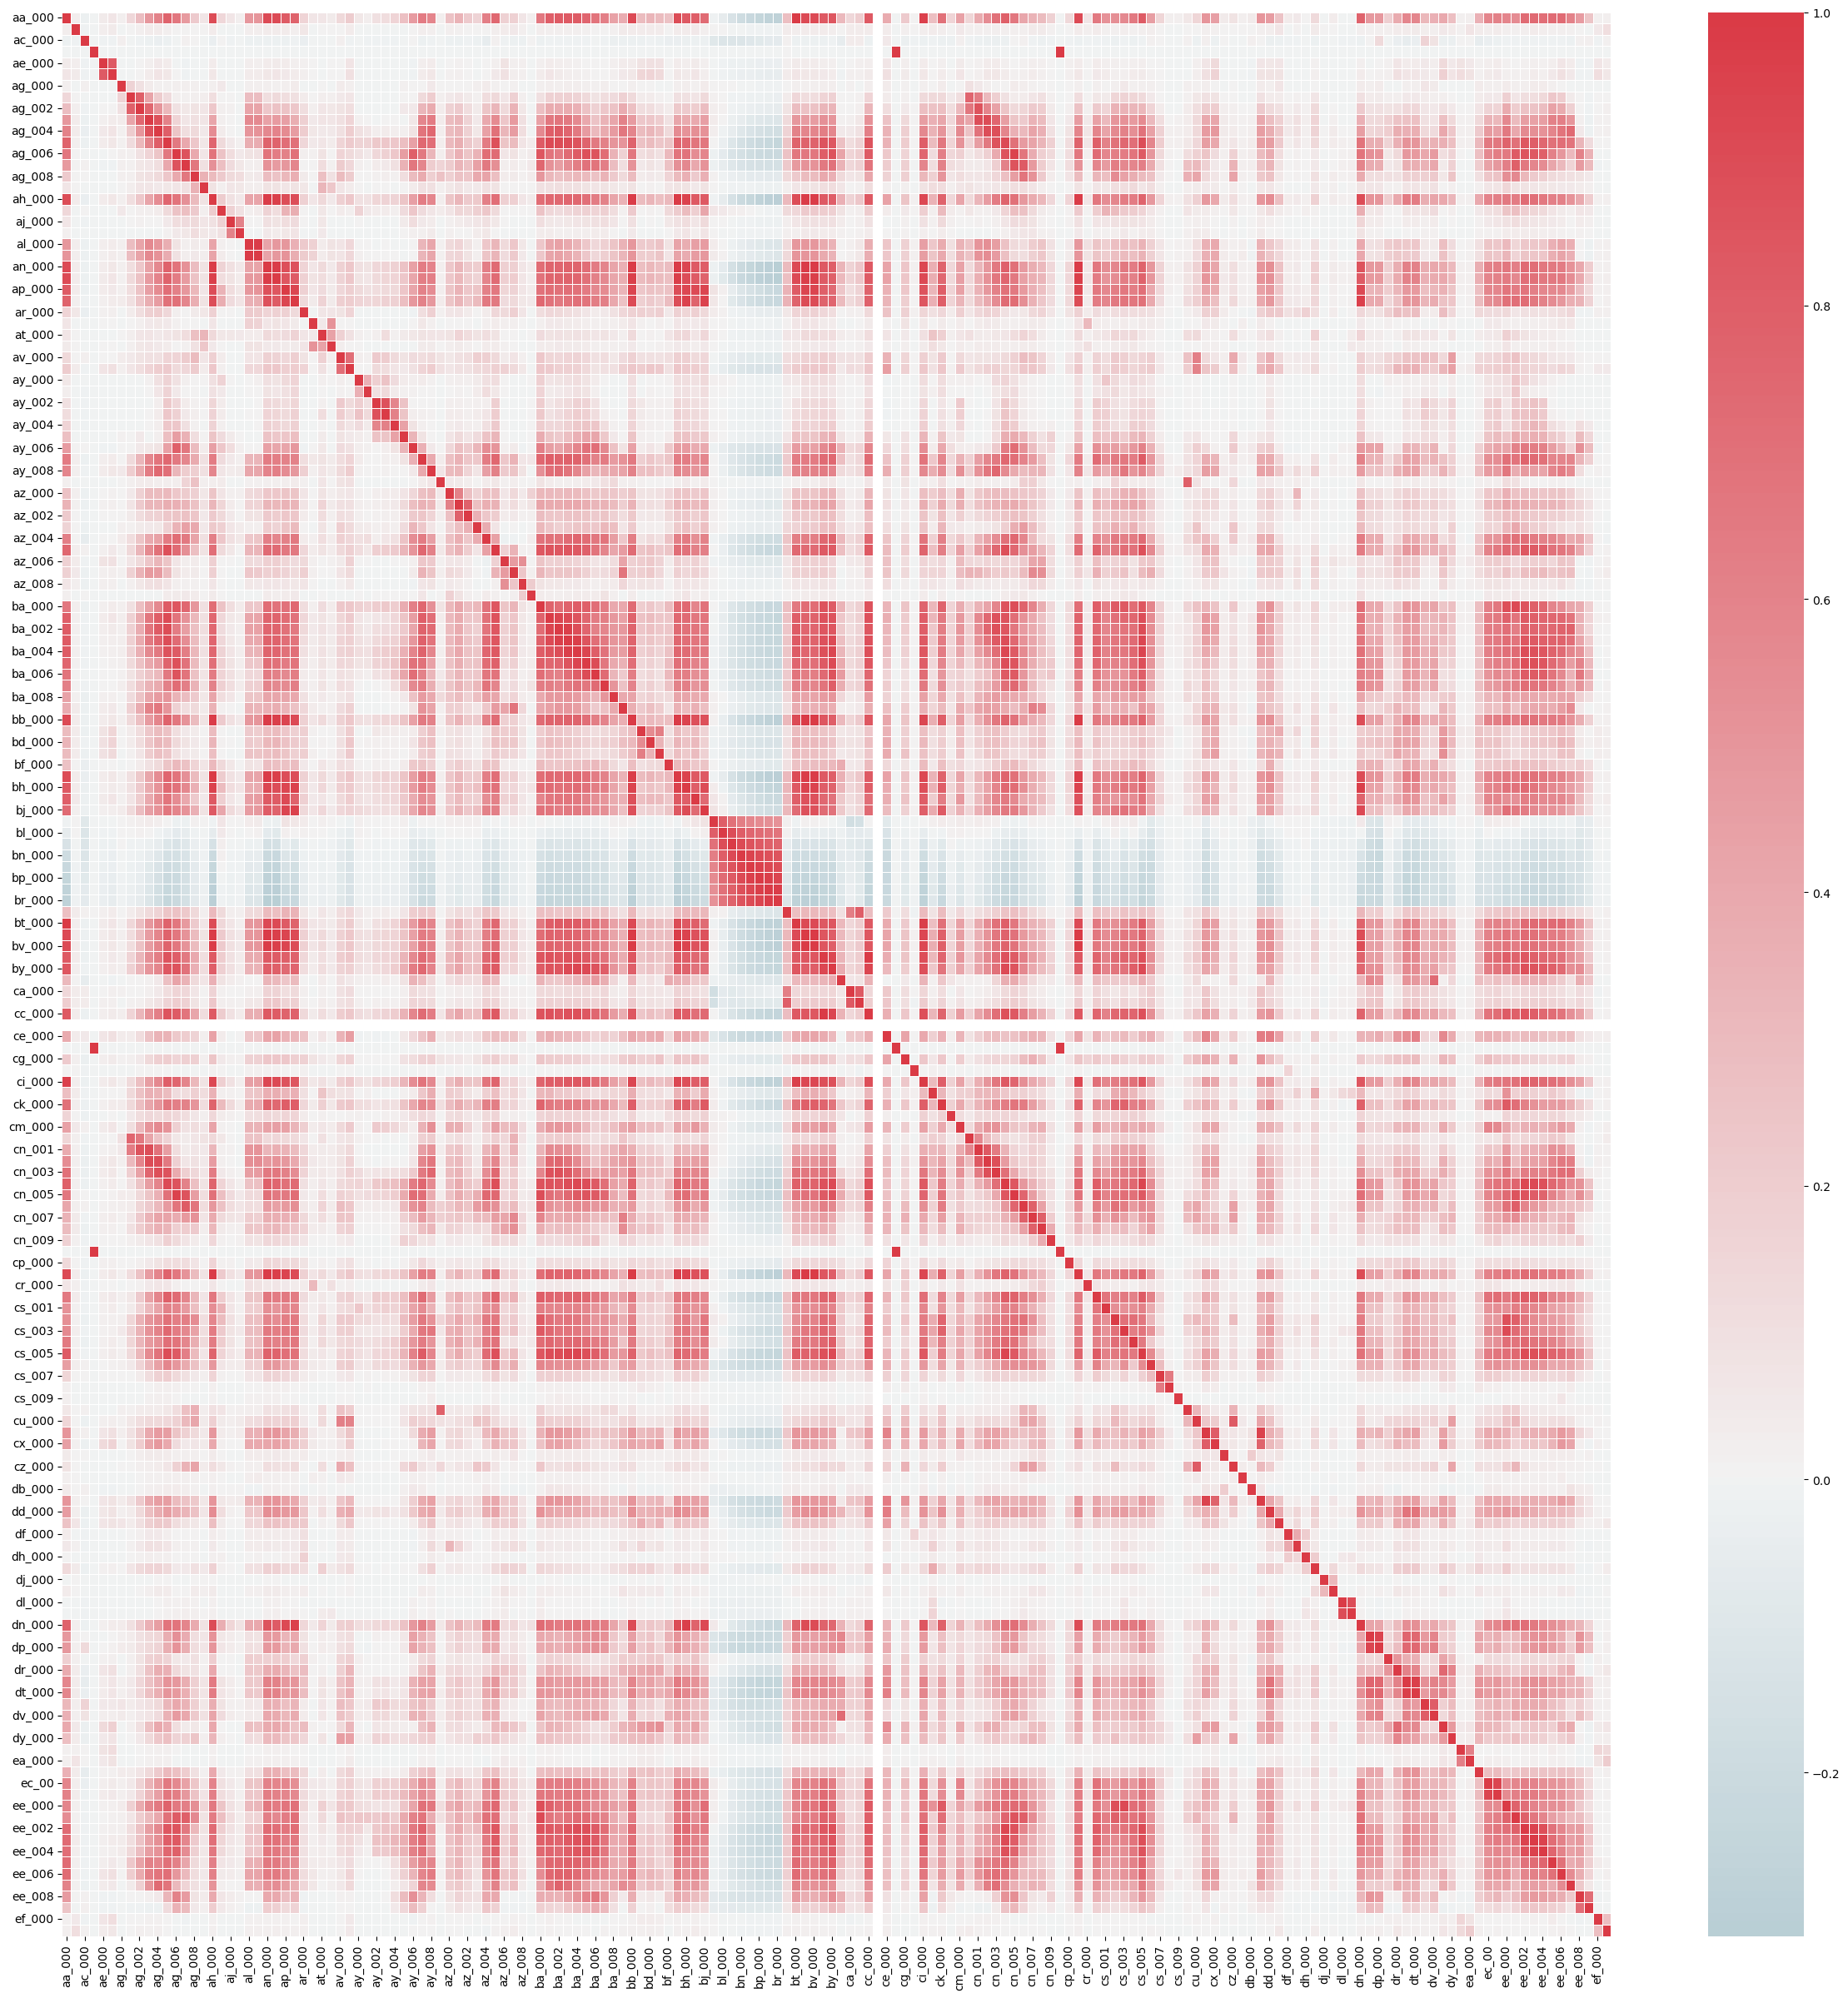

In [8]:
fig, axes = plt.subplots(figsize=(30, 30))
# color coding red for positive correlation and blue for negative
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train_features_imputed.corr(), ax=axes, cmap=cmap, center=0, linewidths=.5)
plt.show()

#### (iv) Make scatter plots and box plots

In [9]:
num_features = int(np.sqrt(170))
top_features = cv_train_df.sort_values(by='CV', ascending=False).head(num_features)
top_features

CV
cs_009  235.277605
cf_000  184.233092
co_000  183.949017
ad_000  183.847620
dh_000  114.984991
dj_000  109.647285
ag_000   91.878565
as_000   86.416904
ay_009   83.786063
az_009   76.967978
ak_000   74.526688
au_000   68.160554
ch_000   58.268229

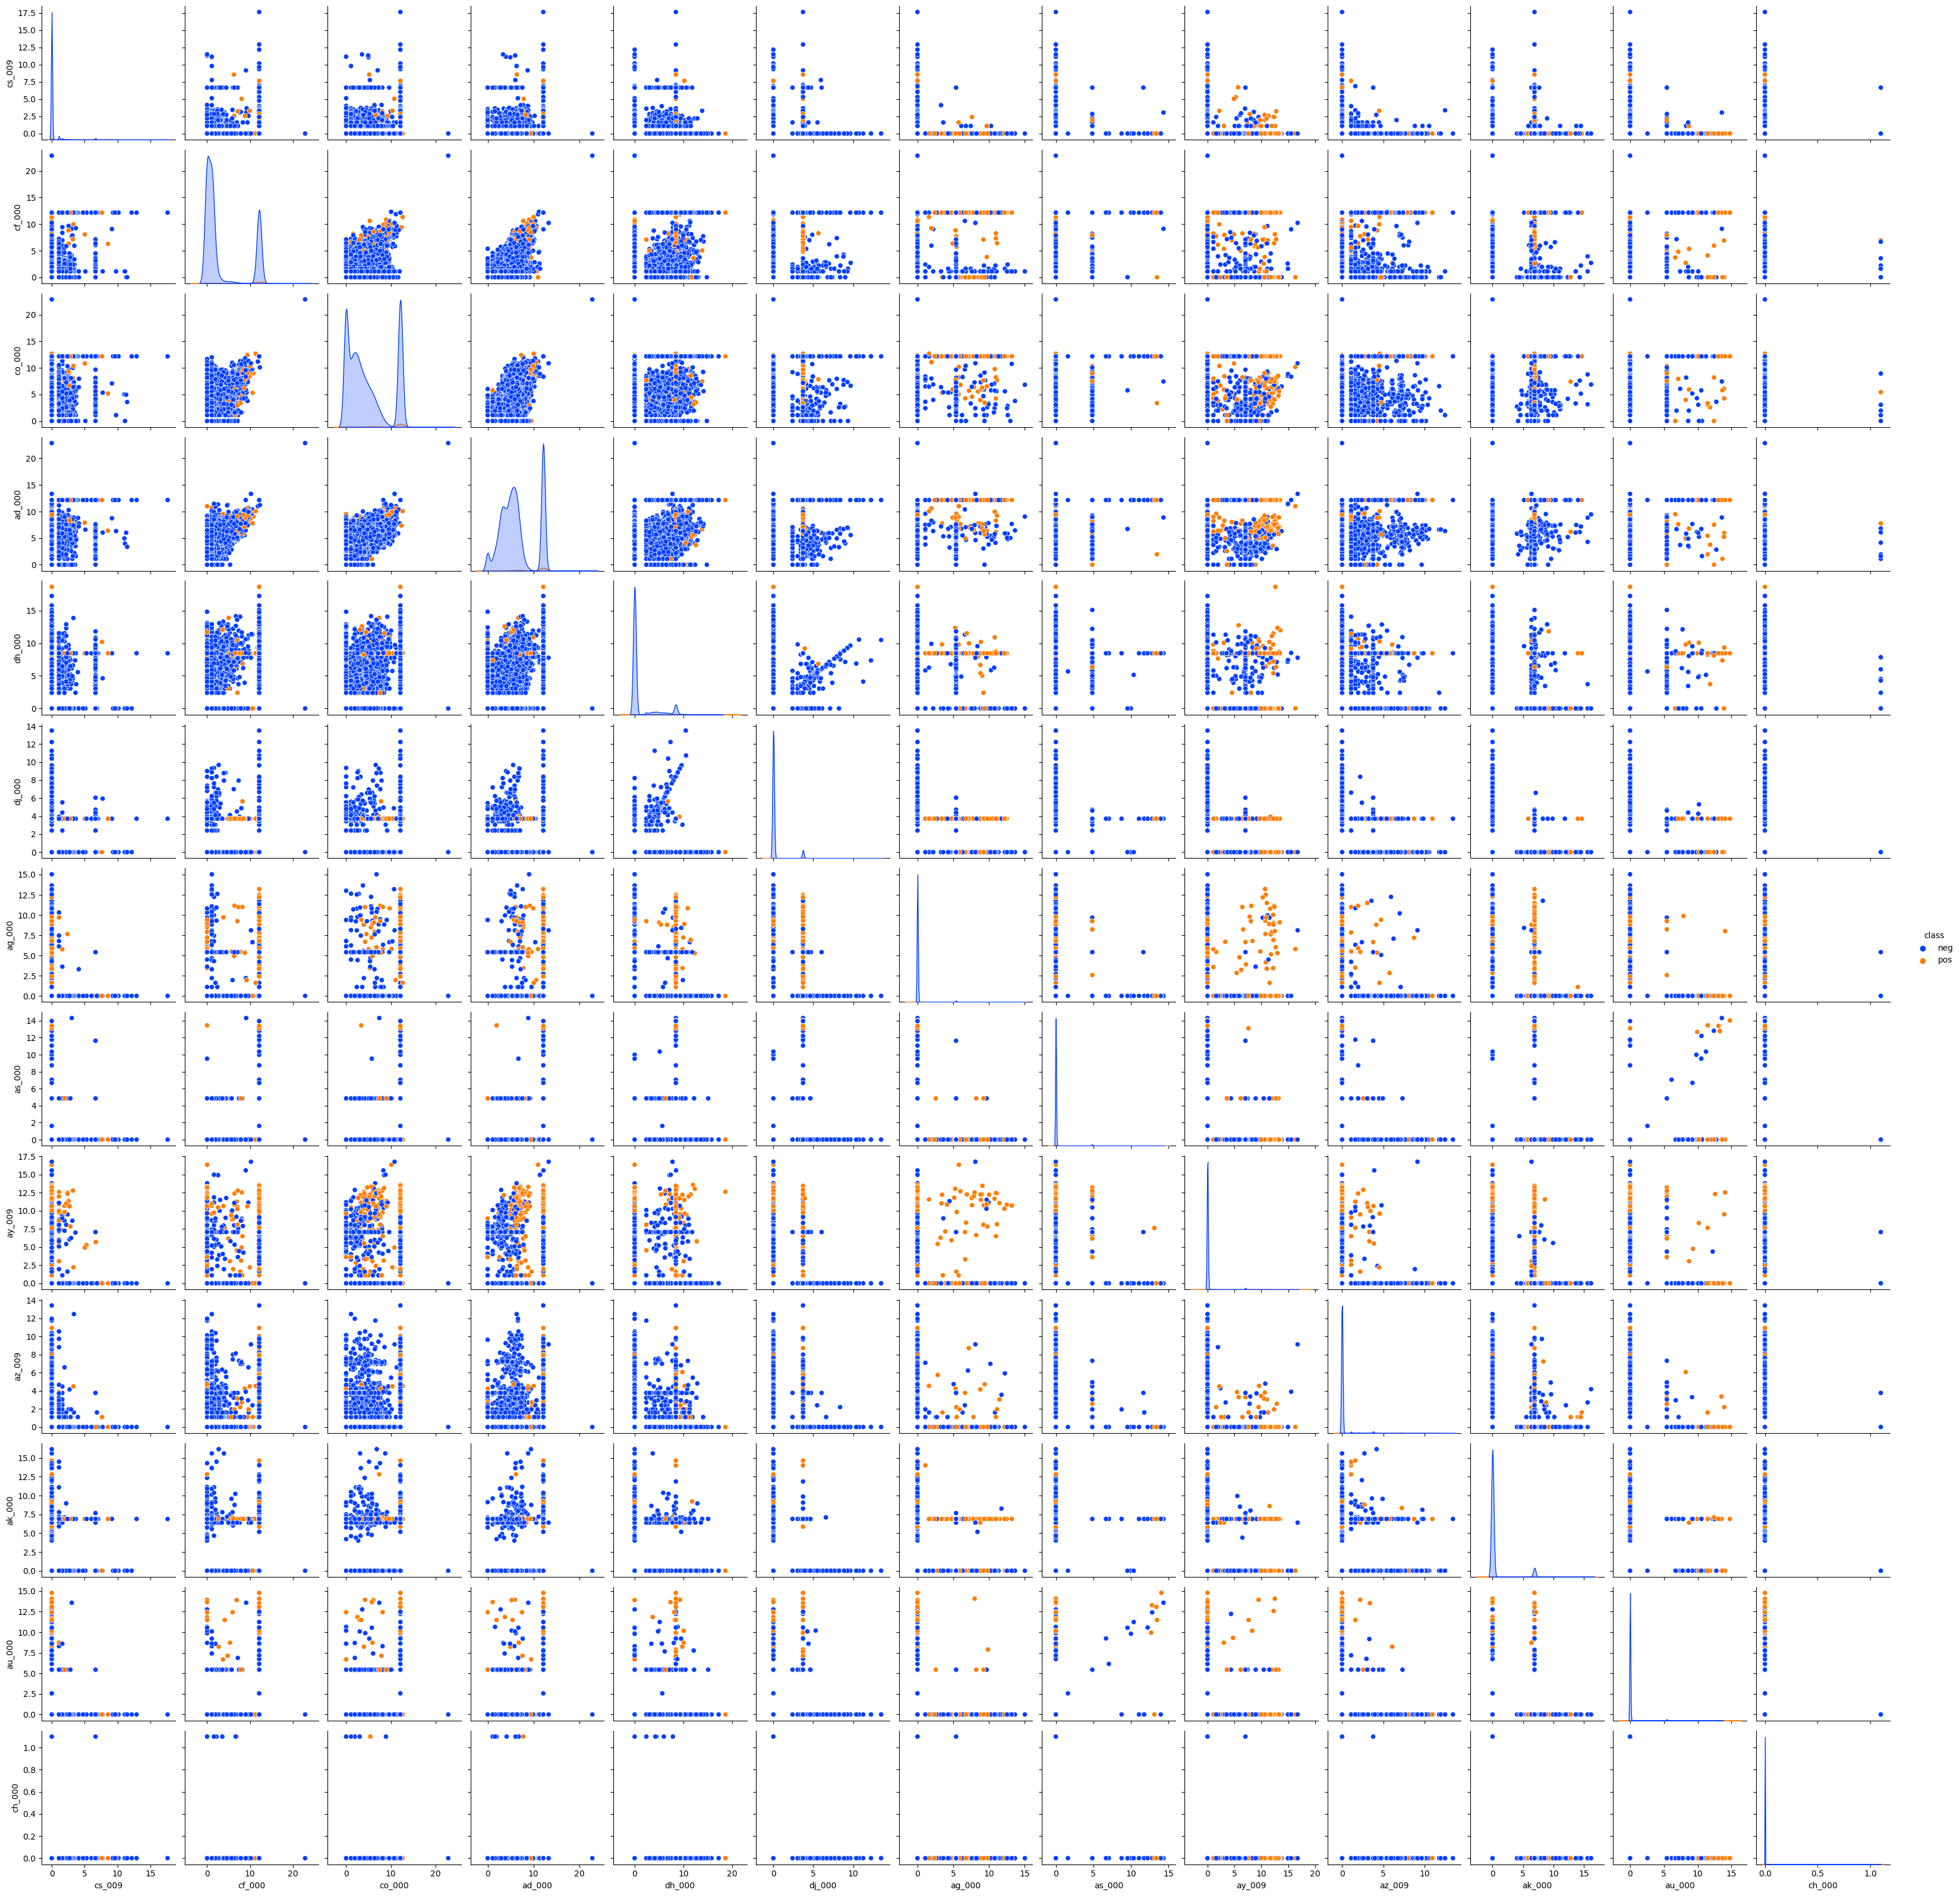

In [10]:
# scatter plots, with color coding to differentiate between classes
top_feature_names = top_features.index.tolist()

train_plt = train_features_imputed[top_feature_names].copy()
# log-transform the top features
train_plt_log = np.log1p(train_plt)

# adding the class label for color coding
train_plt_log['class'] = train_data['class']

sns.pairplot(train_plt_log, hue='class', palette='bright')
plt.show()

[None]

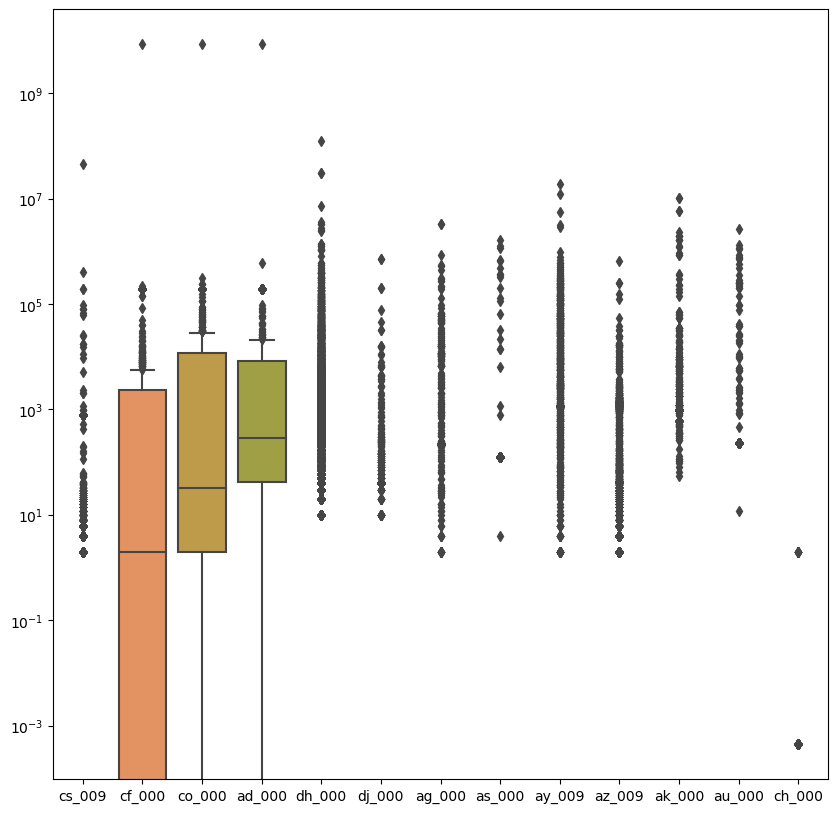

In [11]:
# box plots
fig, axes = plt.subplots(figsize=(10, 10))
boxPlot = sns.boxplot(data=train_plt, ax=axes)
boxPlot.set(yscale='log')

It is not possible to tell the significance of our features from just the scatter plots alone. Even with color coding the two different classes and transforming the scale to be logarithmic, there are no pairwise combinations of features that show a degree of seperation between the two classes or even a discnerible pattern between the two features such as a linear correlation etc. 

I would say that ay_009 vs ag_000 is one of the few plots that may indicate significance, as we can see a cluster of orange towards the center of the plot and blue more towards the edges. However, even still, we cannot make any definitive conclusions about the significance of these features.

#### (v) Is this data set imbalanced?

In [12]:
train_plt['class'] = train_data['class']
class_counts = train_plt['class'].value_counts()
class_counts

class
neg    59000
pos     1000
Name: count, dtype: int64

We can see that the number of negative data points massively outnumbers the positive ones, so our training data is clearly very imbalanced.

### (c) Train a random forest

In [13]:
y_train, y_test = train_data['class'], test_data['class']

# train random forest model on imputed training data
rf = RandomForestClassifier(oob_score=True, random_state=42)
rf.fit(train_features_imputed, y_train)

# make predictions
train_pred = rf.predict(train_features_imputed)
test_pred = rf.predict(test_features_imputed)

# confusion Matrix
train_confusion_matrix = confusion_matrix(y_train, train_pred)
test_confusion_matrix = confusion_matrix(y_test, test_pred)

print("Confusion matrix for training data:")
print(train_confusion_matrix)

print("\nConfusion matrix for test data:")
print(test_confusion_matrix)

Confusion matrix for training data:
[[59000     0]
 [    1   999]]

Confusion matrix for test data:
[[15609    16]
 [  107   268]]


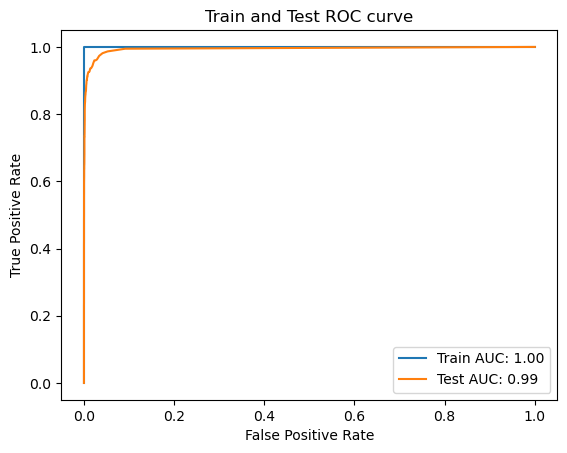

In [14]:
class_mapping = {'neg': 0, 'pos': 1}
y_train_bin = y_train.map(class_mapping)
y_test_bin = y_test.map(class_mapping)

# calculate probabilities for ROC curve
train_prob = rf.predict_proba(train_features_imputed)[:, 1]
test_prob = rf.predict_proba(test_features_imputed)[:, 1]

# ROC
train_fpr, train_tpr, _ = roc_curve(y_train_bin, train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test_bin, test_prob)

# AUC
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# plot ROC
plt.plot(train_fpr, train_tpr, label=f'Train AUC: {train_auc:.2f}')
plt.plot(test_fpr, test_tpr, label=f'Test AUC: {test_auc:.2f}')
plt.title('Train and Test ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [15]:
# misclassification rate
train_error = 1 - accuracy_score(y_train, train_pred)
test_error = 1 - accuracy_score(y_test, test_pred)

print(f"Missclassification rate on training data: {train_error}")
print(f"Missclassification rate on test data: {test_error}")

Missclassification rate on training data: 1.666666666666483e-05
Missclassification rate on test data: 0.007687499999999958


In [16]:
# out of bag error
oob_error = 1 - rf.oob_score_

print(f"OOB Error: {oob_error}")

# compare OOB error to test error
print(f"Is OOB error less than Test error? {'Yes' if oob_error < test_error else 'No'}")

OOB Error: 0.00605
Is OOB error less than Test error? Yes


### (d) Research class imbalance in random forest

Below are some strategies that can be employed to handle class imbalance:

- Model weights - we can adjust the weights in our Random Forest model to be inversely proportional to class frequencies so that the model is less inclined to classify to the over-represented class.
- Resampling - we can use a method like SMOTE to balance our training data by generating artificial samples for the minority class.
- Altering Splitting Criteria - we usually look for splits that maximize the reduction in Gini impurity or entropy. However, when dealing with imbalanced classes, we can instead adjust the splitting criteria to prioritize splits that achieve a more balanced class distribution in the child nodes.

In [17]:
# train random forest model on imputed training data
rf_balance = RandomForestClassifier(oob_score=True, random_state=42, max_depth=5, class_weight='balanced')
rf_balance.fit(train_features_imputed, y_train)

# make predictions
train_pred_balance = rf_balance.predict(train_features_imputed)
test_pred_balance = rf_balance.predict(test_features_imputed)

# confusion Matrix
train_confusion_matrix_bal = confusion_matrix(y_train, train_pred_balance)
test_confusion_matrix_bal = confusion_matrix(y_test, test_pred_balance)

print("Confusion matrix for training data:")
print(train_confusion_matrix_bal)

print("\nConfusion matrix for test data:")
print(test_confusion_matrix_bal)

Confusion matrix for training data:
[[56610  2390]
 [   31   969]]

Confusion matrix for test data:
[[15013   612]
 [   12   363]]


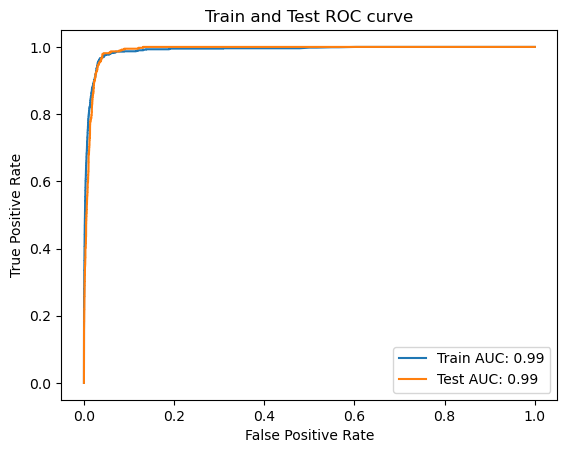

In [18]:
# calculate probabilities for ROC curve
train_prob_balance = rf_balance.predict_proba(train_features_imputed)[:, 1]
test_prob_balance = rf_balance.predict_proba(test_features_imputed)[:, 1]

# ROC
train_fpr, train_tpr, _ = roc_curve(y_train_bin, train_prob_balance)
test_fpr, test_tpr, _ = roc_curve(y_test_bin, test_prob_balance)

# AUC
train_auc_bal = auc(train_fpr, train_tpr)
test_auc_bal = auc(test_fpr, test_tpr)

# plot ROC
plt.plot(train_fpr, train_tpr, label=f'Train AUC: {train_auc_bal:.2f}')
plt.plot(test_fpr, test_tpr, label=f'Test AUC: {test_auc_bal:.2f}')
plt.title('Train and Test ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [19]:
# misclassification rate
train_error_bal = 1 - accuracy_score(y_train, train_pred_balance)
test_error_bal = 1 - accuracy_score(y_test, test_pred_balance)

print(f"Missclassification rate on training data: {train_error_bal}")
print(f"Missclassification rate on test data: {test_error_bal}")

Missclassification rate on training data: 0.04035
Missclassification rate on test data: 0.039000000000000035


In [20]:
# out of bag error
oob_error = 1 - rf_balance.oob_score_

print(f"OOB Error: {oob_error}")

# compare OOB error to test error
print(f"Is OOB error less than Test error? {'Yes' if oob_error < test_error else 'No'}")

OOB Error: 0.04156666666666664
Is OOB error less than Test error? No


The test error and training error goes up when we compensate for class imbalance which is to be expected, the nature of the data we are making predictions on is heavily imbalanced in favor of the negative class so when we deliberately force our model to balance its weights more towards the positive class the training and test error will naturally increase (especially the training error).

However, the advantage here is that our model has become much better at classifying the positive samples where it is now correctly classifying 363 (12 missclassifications) of the positive samples whereas before it was only able correctly classify 268 (missclassifying 107) of the positive samples. This comes at a cost to its ability to classify the negative samples however, which leads to our overall test error increasing. But if we are particularly interested in our ability to classify positive samples then this can be considered beneficial.

### (e) XGBoost and Model Trees

In [21]:
# Define the model for classification
xgb_model = xgb.XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=150, objective='binary:logistic', use_label_encoder=False)

# alpha values
param_grid = {'reg_alpha': [10**i for i in range(-5, 5)]}

# 5 fold cross validation
splitter = KFold(n_splits=5, shuffle=True, random_state=42)

# perform the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=splitter, verbose=1)
grid_search.fit(train_features_imputed, y_train_bin)

# compute predictions using the best alpha
xgb_train_y_pred = grid_search.best_estimator_.predict(train_features_imputed)
xgb_test_y_pred = grid_search.best_estimator_.predict(test_features_imputed)

# calculate train and test error
xgb_train_error = 1 - accuracy_score(y_train_bin, xgb_train_y_pred)
xgb_test_error = 1 - accuracy_score(y_test_bin, xgb_test_y_pred)

print(f"\nAlpha: {grid_search.best_params_['reg_alpha']}")
print(f"\nCross-validation error with best alpha: {1 - grid_search.best_score_:.4f}")
print(f"\nTraining Error: {xgb_train_error:.4f}")
print(f"Test Error: {xgb_test_error:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Alpha: 0.1

Cross-validation error with best alpha: 0.0058

Training Error: 0.0018
Test Error: 0.0066


As expected the 5 fold cross-validation error is higher than the train error, and slightly less than the test error.

In [22]:
# confusion matrices
xgb_train_conf_matrix = confusion_matrix(y_train_bin, xgb_train_y_pred)
xgb_test_conf_matrix = confusion_matrix(y_test_bin, xgb_test_y_pred)

print("\nTraining Confusion Matrix:")
print(xgb_train_conf_matrix)

print("\nTest Confusion Matrix:")
print(xgb_test_conf_matrix)


Training Confusion Matrix:
[[58990    10]
 [   95   905]]

Test Confusion Matrix:
[[15610    15]
 [   91   284]]


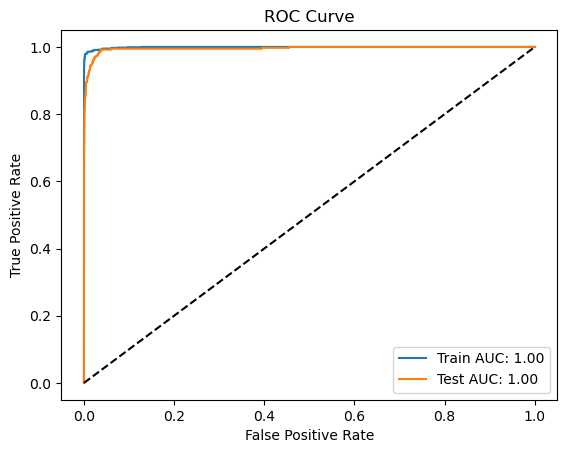

In [23]:
# predict probabilities on the training set
xgb_train_y_pred_proba = grid_search.best_estimator_.predict_proba(train_features_imputed)[:, 1]
xgb_test_y_pred_proba = grid_search.best_estimator_.predict_proba(test_features_imputed)[:, 1]

# compute roc/auc
xgb_train_auc = roc_auc_score(y_train_bin, xgb_train_y_pred_proba)
xgb_test_auc = roc_auc_score(y_test_bin, xgb_test_y_pred_proba)

# calculate roc_curve
train_fpr, train_tpr, _ = roc_curve(y_train_bin, xgb_train_y_pred_proba)
test_fpr, test_tpr, _ = roc_curve(y_test_bin, xgb_test_y_pred_proba)

# plot ROC curves
plt.figure()
plt.plot(train_fpr, train_tpr, label=f'Train AUC: {xgb_train_auc:.2f}')
plt.plot(test_fpr, test_tpr, label=f'Test AUC: {xgb_test_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### (f) Use SMOTE to pre-process your data

The "right" way is to apply SMOTE after creating the train/test split for each fold. Basically, we want SMOTE to only be applied to the training data and not the validation set or test set.

In [24]:
# XGB model, logistic regression L1 penalty with SMOTE
xgb_model_bal = XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=150,
                              objective='binary:logistic', use_label_encoder=False)

# add SMOTE to model pipeline
smote = SMOTE(random_state=42)
pipeline = make_imb_pipeline(smote, xgb_model_bal)

# alpha values
param_grid = {
    'xgbclassifier__reg_alpha': [10**i for i in range(-5, 5)]
}

# 5 fold cross validation
splitter = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy',
                           cv=splitter, verbose=1)

# fit the model
grid_search.fit(train_features_imputed, y_train_bin)

# compute predictions
xgb_train_y_pred_bal = grid_search.predict(train_features_imputed)
xgb_test_y_pred_bal = grid_search.predict(test_features_imputed)

# calculate train and test error
xgb_train_error_bal = 1 - accuracy_score(y_train_bin, xgb_train_y_pred_bal)
xgb_test_error_bal = 1 - accuracy_score(y_test_bin, xgb_test_y_pred_bal)

print(f"\nAlpha: {grid_search.best_params_['xgbclassifier__reg_alpha']}")
print(f"\nCross-validation error with best alpha: {1 - grid_search.best_score_:.4f}")
print(f"\nTraining Error: {xgb_train_error_bal:.4f}")
print(f"Test Error: {xgb_test_error_bal:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Alpha: 0.1

Cross-validation error with best alpha: 0.0104

Training Error: 0.0065
Test Error: 0.0102


Here the 5 fold cross-validation error is larger than the training error as expected and is very slightly higher than the test error.

In [25]:
# confusion matrices
xgb_train_conf_matrix_bal = confusion_matrix(y_train_bin, xgb_train_y_pred_bal)
xgb_test_conf_matrix_bal = confusion_matrix(y_test_bin, xgb_test_y_pred_bal)

print("\nTraining Confusion Matrix:")
print(xgb_train_conf_matrix_bal)

print("\nTest Confusion Matrix:")
print(xgb_test_conf_matrix_bal)


Training Confusion Matrix:
[[58672   328]
 [   63   937]]

Test Confusion Matrix:
[[15511   114]
 [   50   325]]


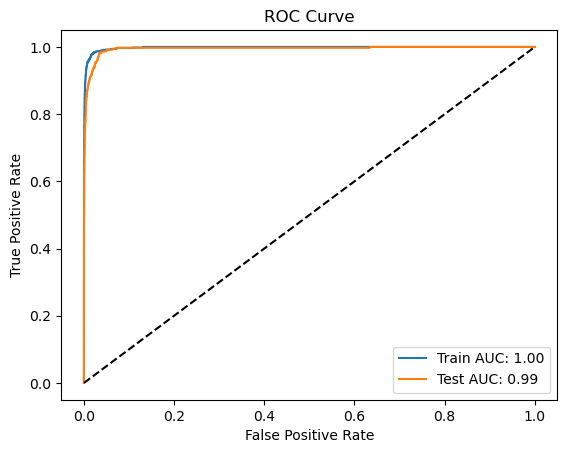

In [26]:
# predict probabilities
xgb_train_y_pred_prob_bal = grid_search.best_estimator_.predict_proba(train_features_imputed)[:, 1]
xgb_test_y_pred_prob_bal = grid_search.best_estimator_.predict_proba(test_features_imputed)[:, 1]

# compute roc/auc scores
xgb_train_auc_bal = roc_auc_score(y_train_bin, xgb_train_y_pred_prob_bal)
xgb_test_auc_bal = roc_auc_score(y_test_bin, xgb_test_y_pred_prob_bal)

# calculate roc_curve
train_fpr, train_tpr, _ = roc_curve(y_train_bin, xgb_train_y_pred_prob_bal)
test_fpr, test_tpr, _ = roc_curve(y_test_bin, xgb_test_y_pred_prob_bal)

# plot ROC curves
plt.figure()
plt.plot(train_fpr, train_tpr, label=f'Train AUC: {xgb_train_auc_bal:.2f}')
plt.plot(test_fpr, test_tpr, label=f'Test AUC: {xgb_test_auc_bal:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

Similar to part d, using SMOTE on our XGBoost model increases our overall training and testing error (making the model worse in terms of overall performance). However, we can see from our confusion matrices that the model becomes better at classifying positive samples, at the cost of reduced accuracy on the negative samples which leads to the increased training/test error.

## 2. ISLR 6.6.3

3a. Steadily decrease. 

As we increase s we are reducing the bias and increasing variance as the coefficients are allowed to take on larger values, therfore we will be able to fit more closely to the training data so training RSS will decrease.

b. Decrease initially, and then eventually start increasing in a U shape. 

Our training RSS will decrease initially as our model will initially be the null model when s = 0, which is obviously massively underfit. So we can expect the test RSS to decrease initially as our model becomes able to learn from the training data, but eventually our model will overfit to the training data causing the test RSS to increase.

c. Steadily increase.

Increasing s causes our model to become more flexible, thus, increasing variance.

d. Steadily decrease.

Increasing s causes our model to become more flexible, thus, decreasing bias.

e. Remain constant.

The irreducible error represents the amount of error that is outside our model's predictive ability, due to randomness or some variability that is not captured in our model. Therfore, changing s will have no impact on the irreducible error.

## 3. ISLR 6.6.5

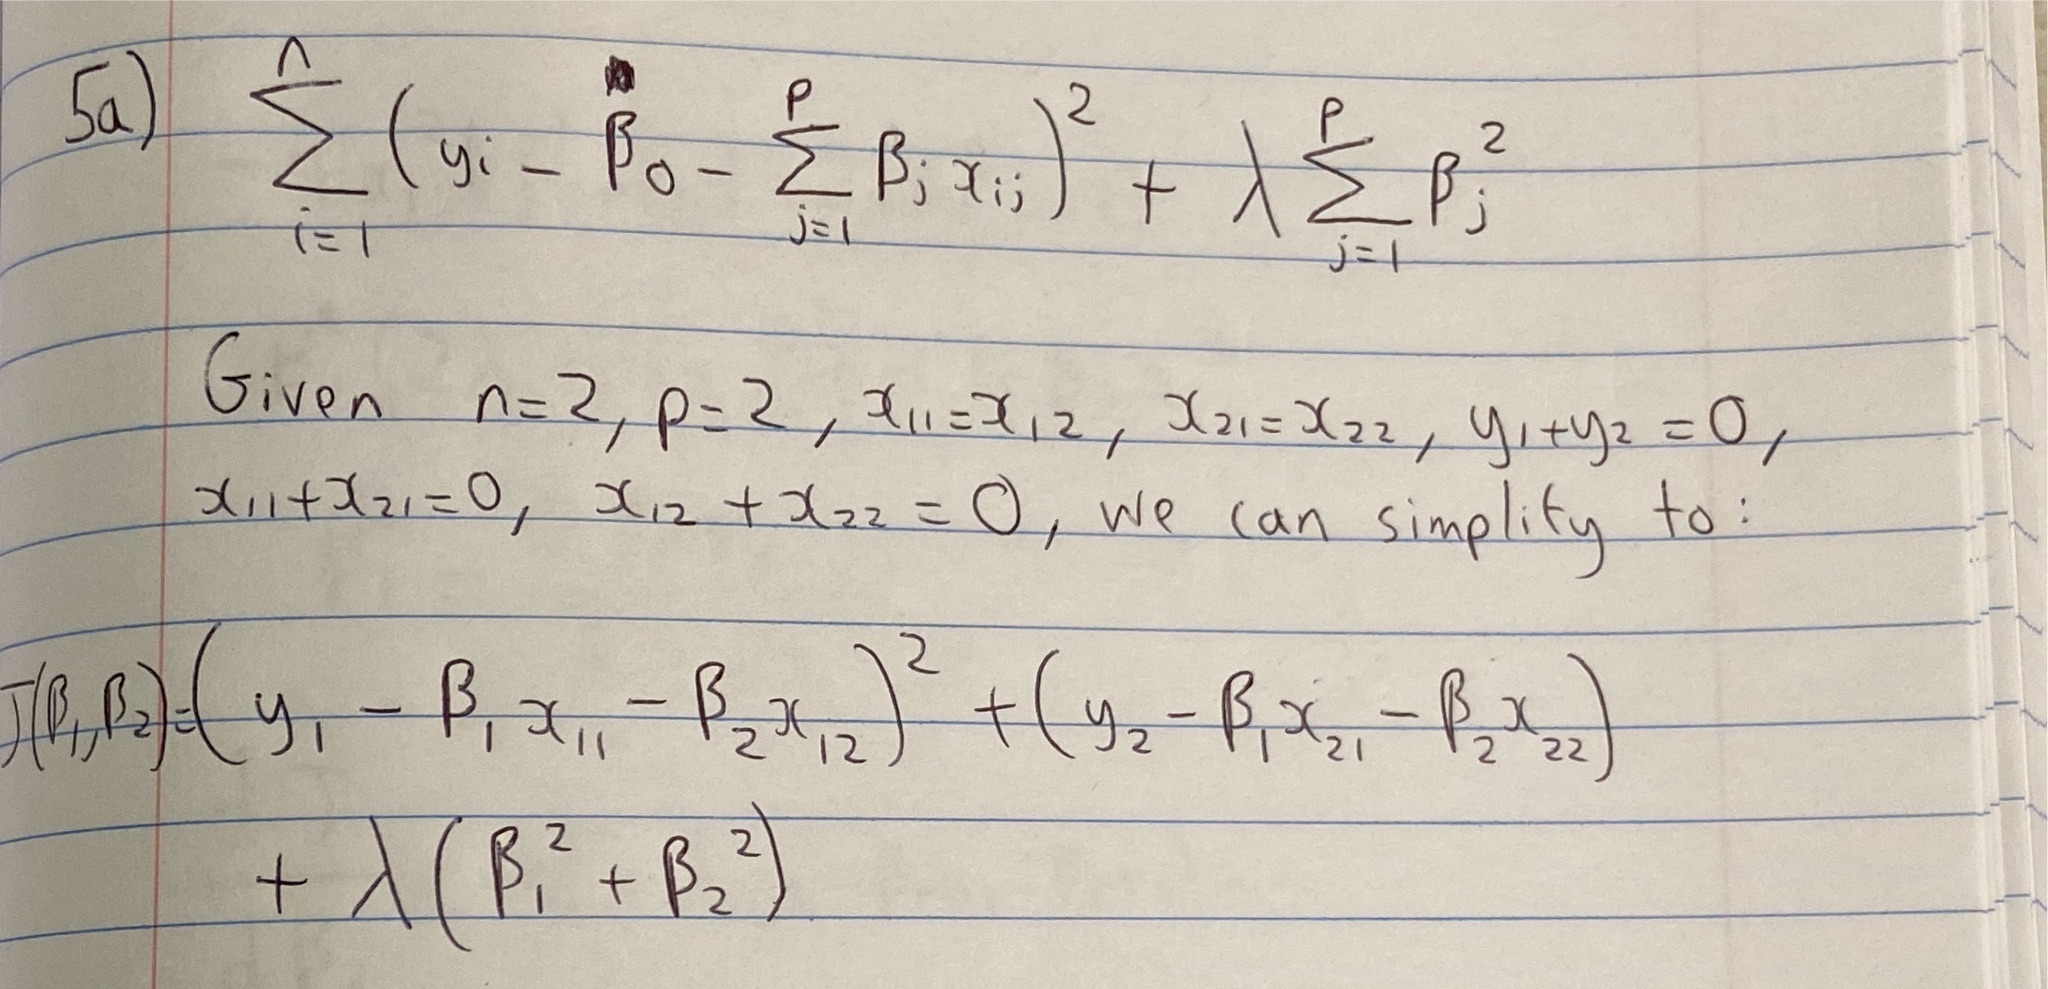

In [27]:
fig = Image(filename=('./ISLR 6.5 1.jpeg'))
fig

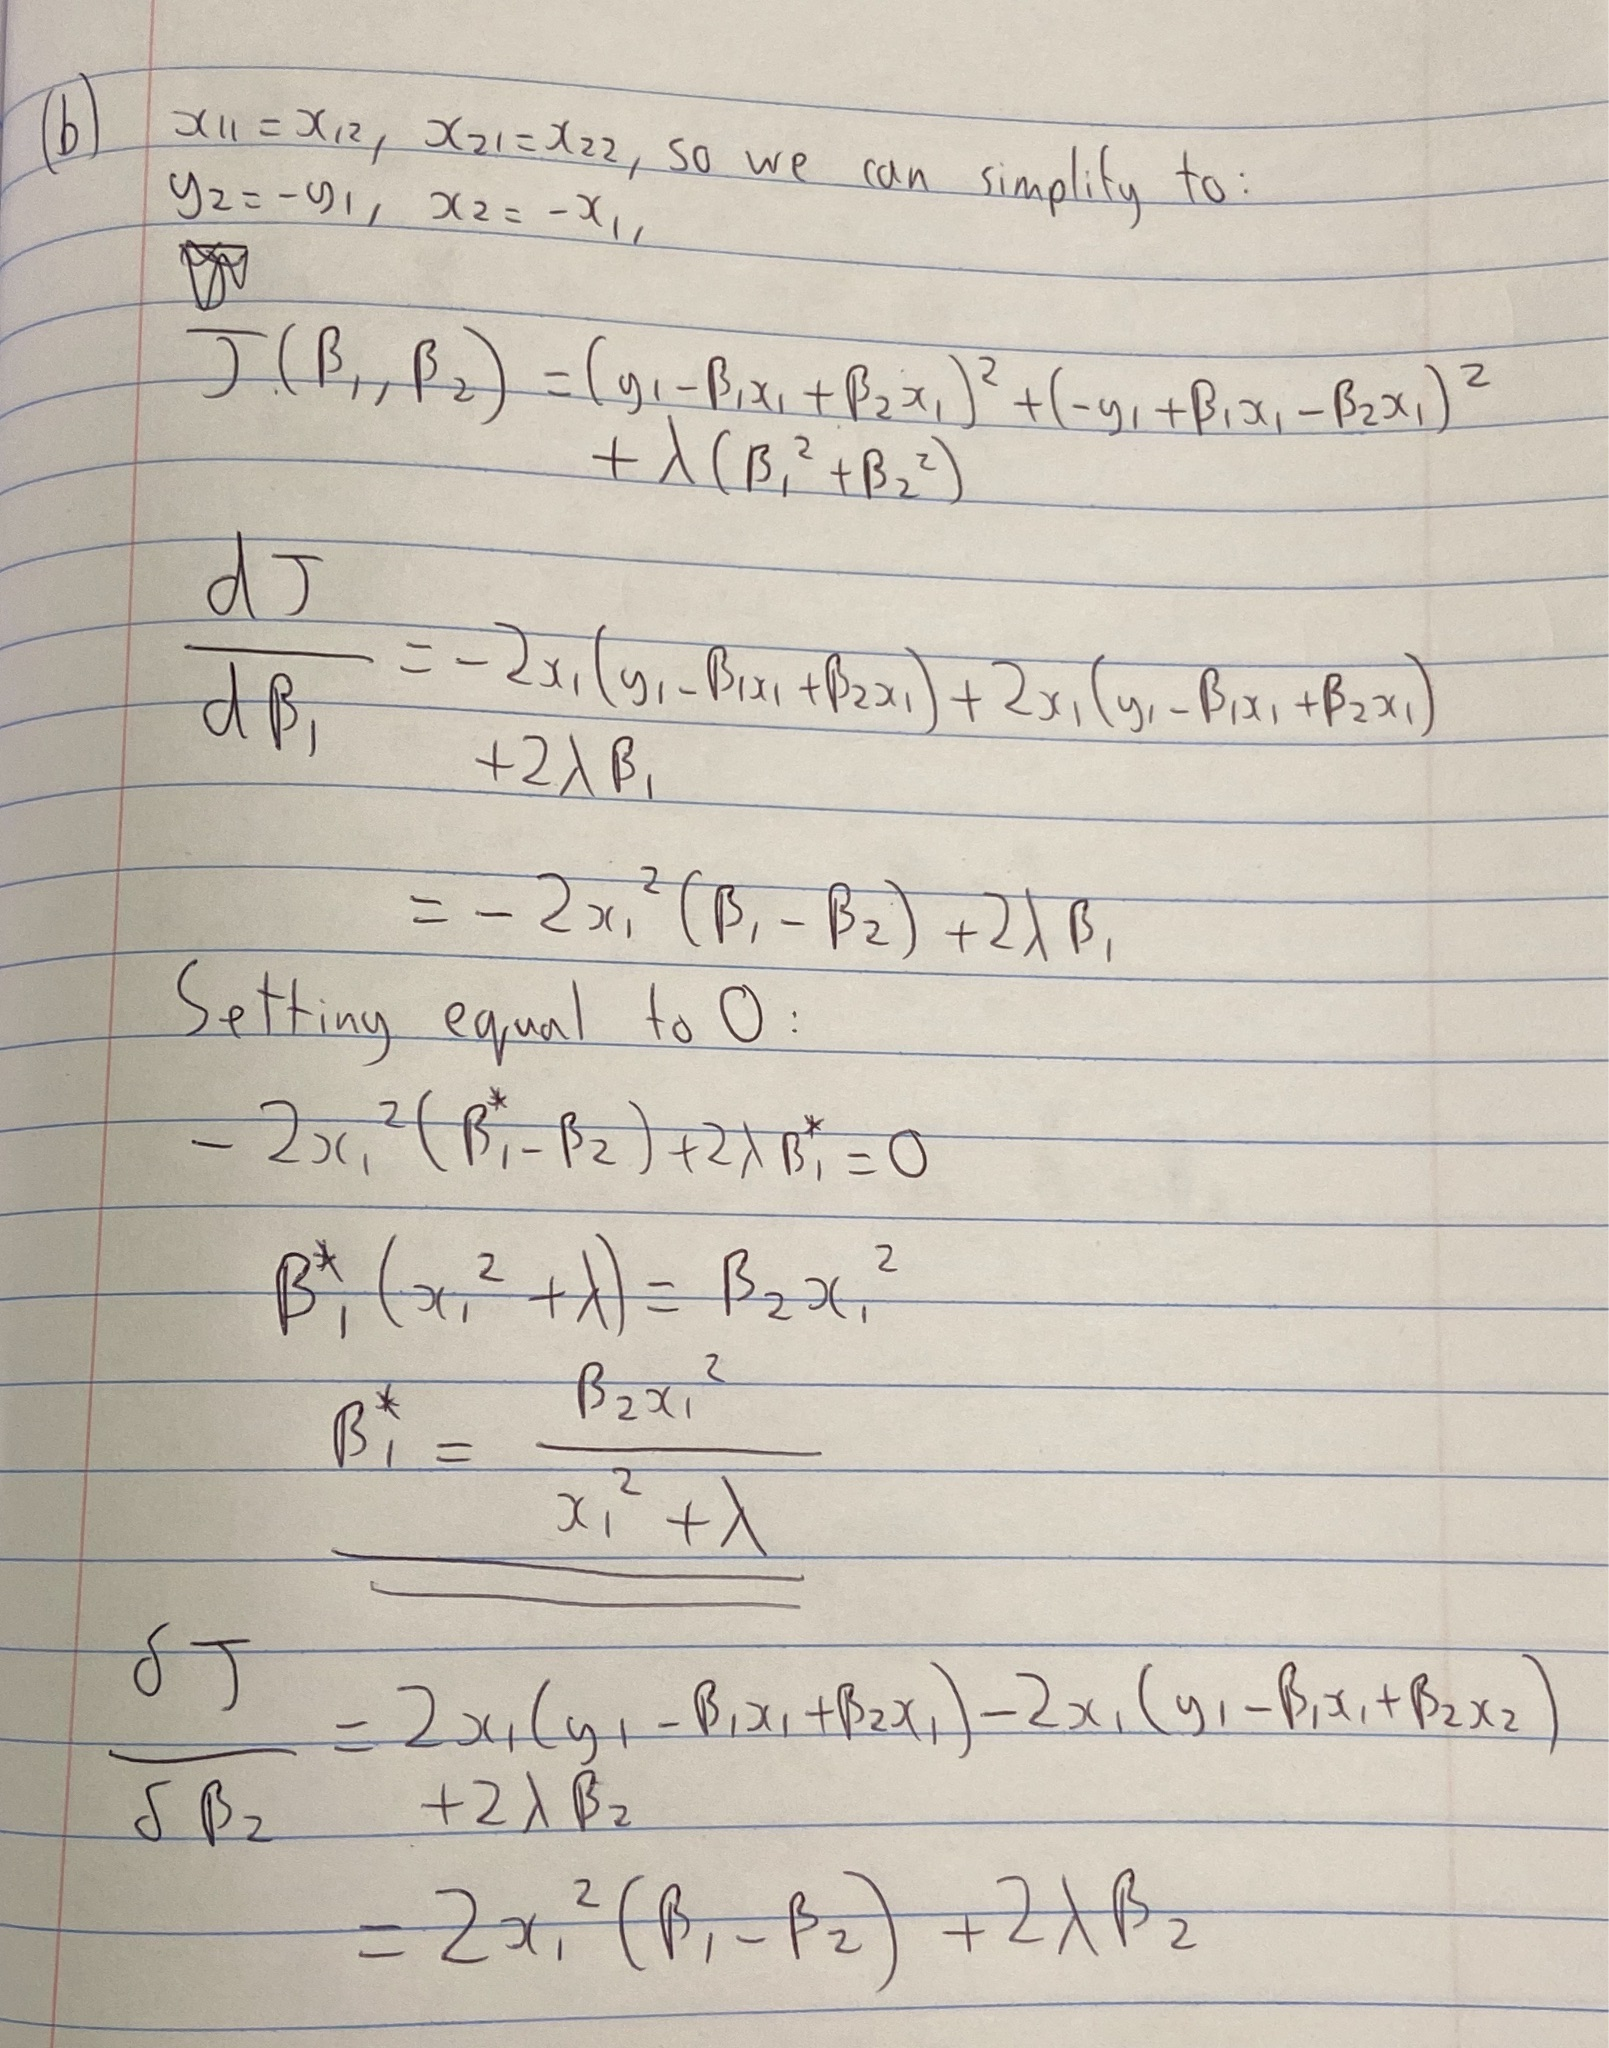

In [28]:
fig = Image(filename=('./ISLR 6.5 2.jpeg'))
fig

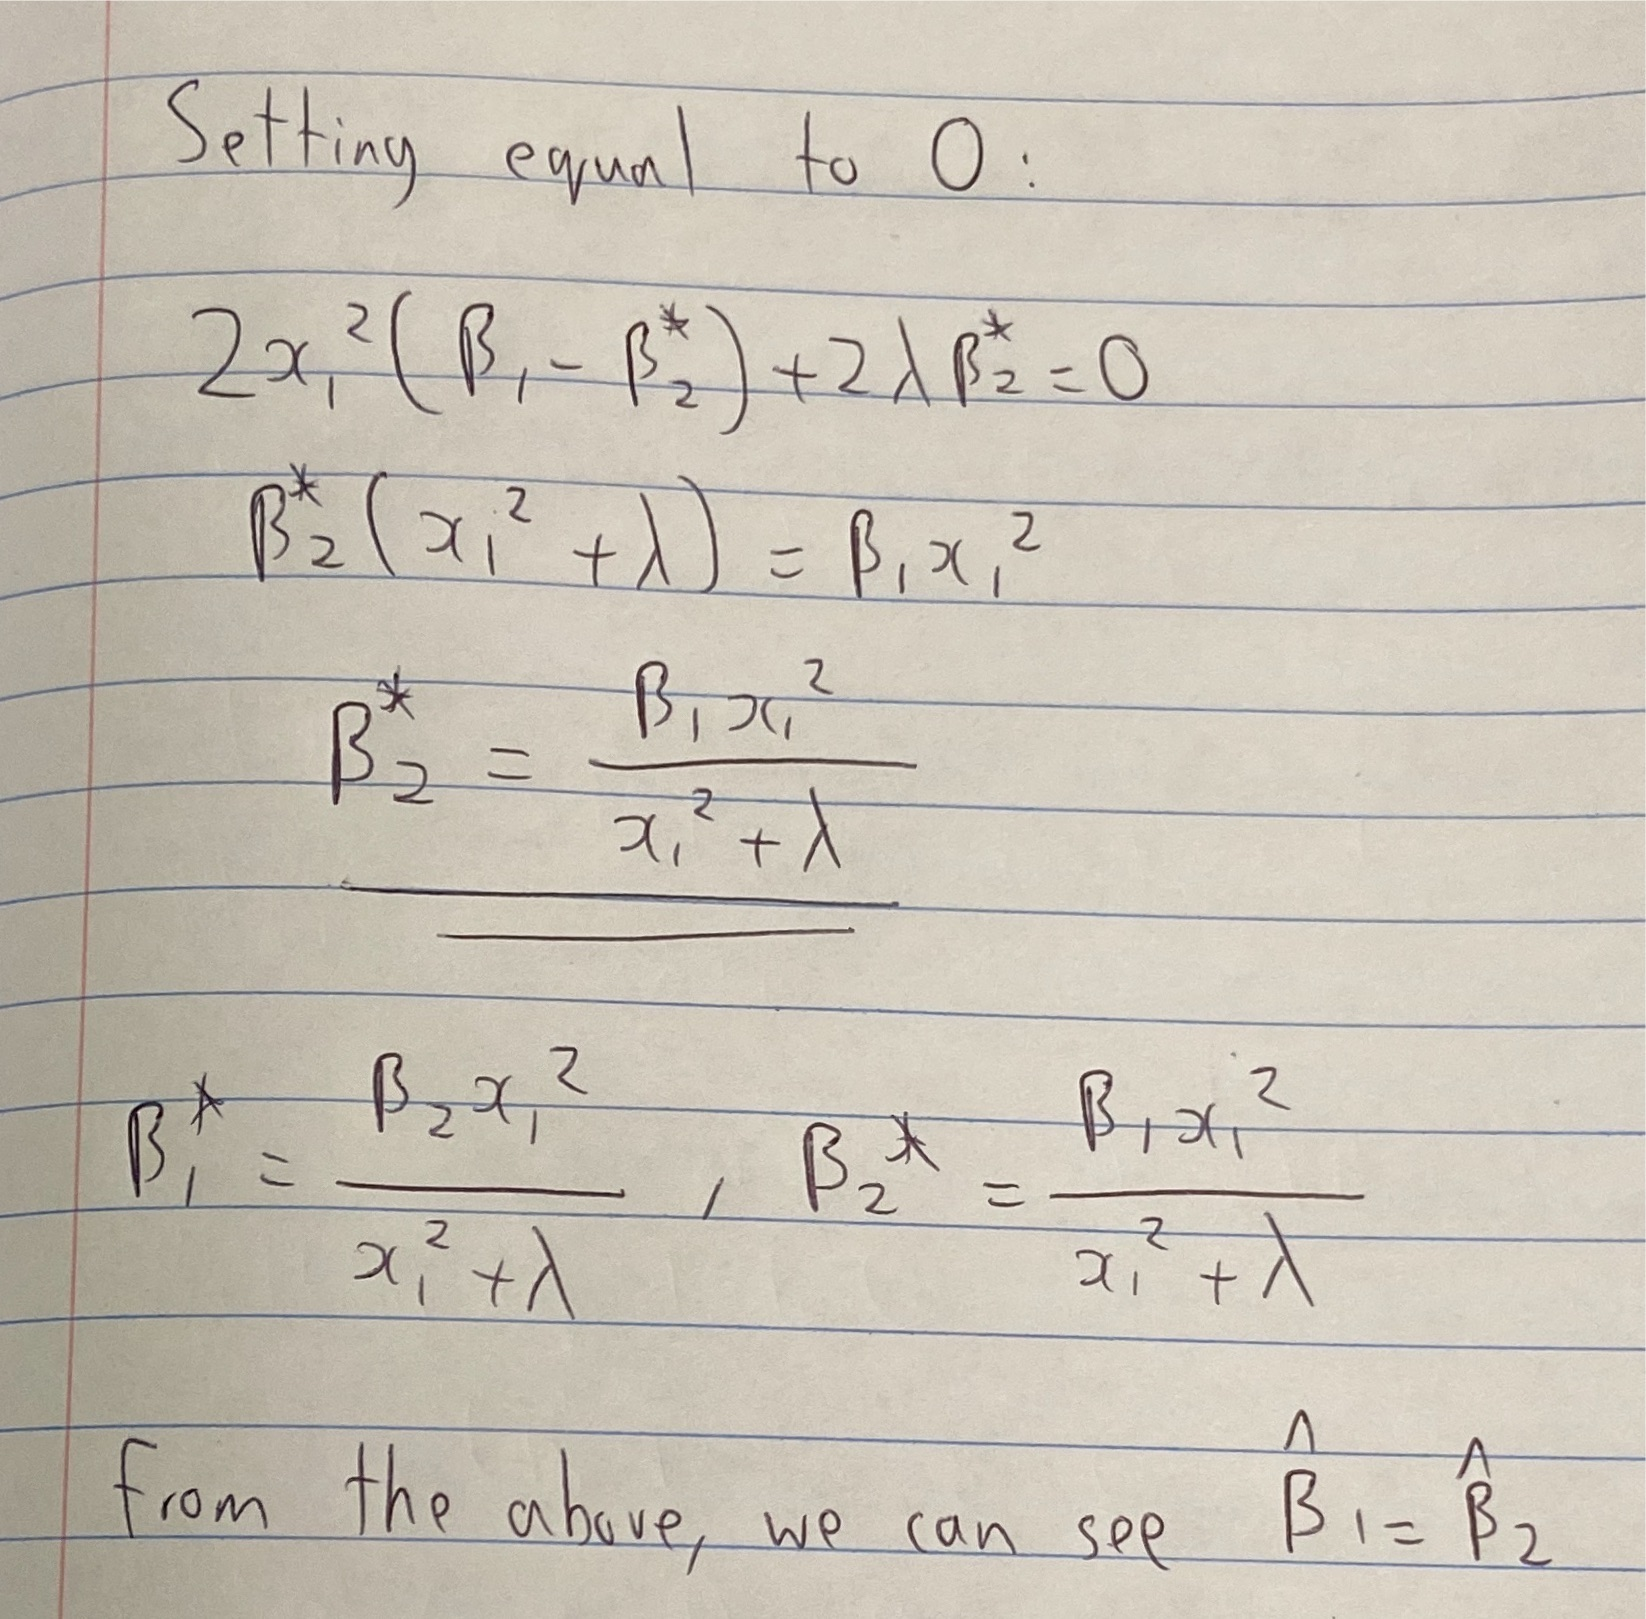

In [29]:
fig = Image(filename=('./ISLR 6.5 3.jpeg'))
fig

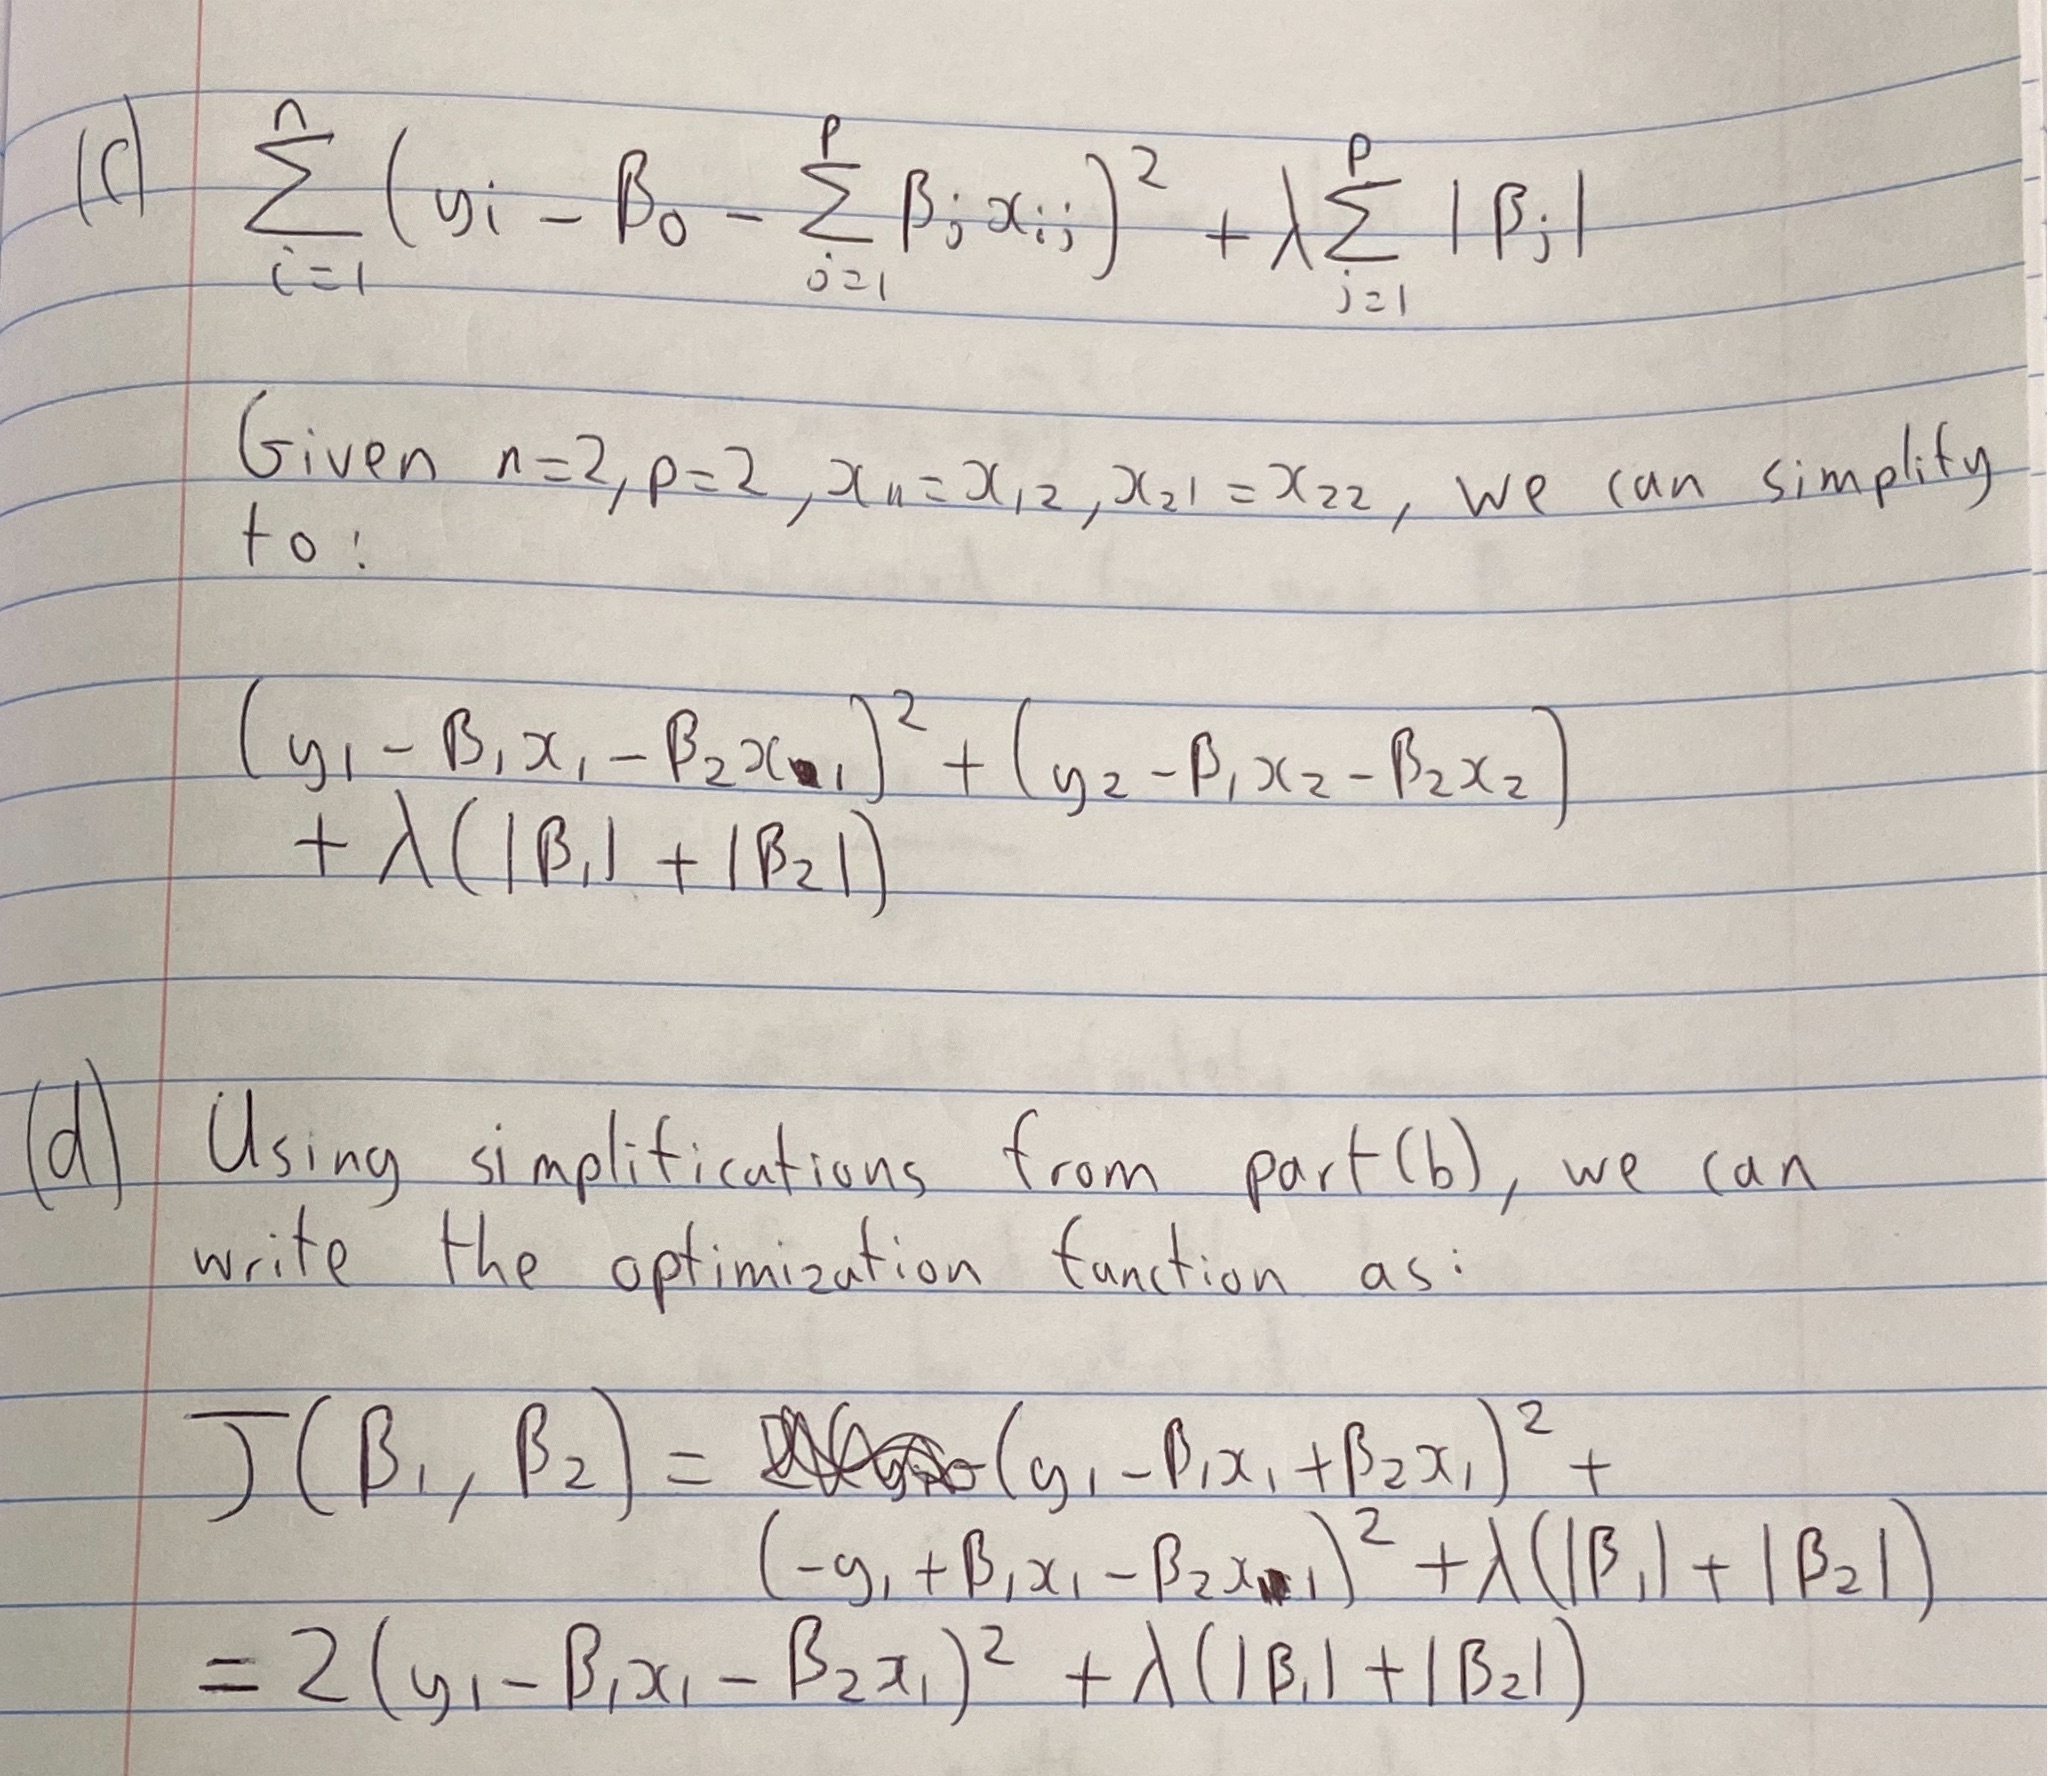

In [30]:
fig = Image(filename=('./ISLR 6.5 4.jpeg'))
fig

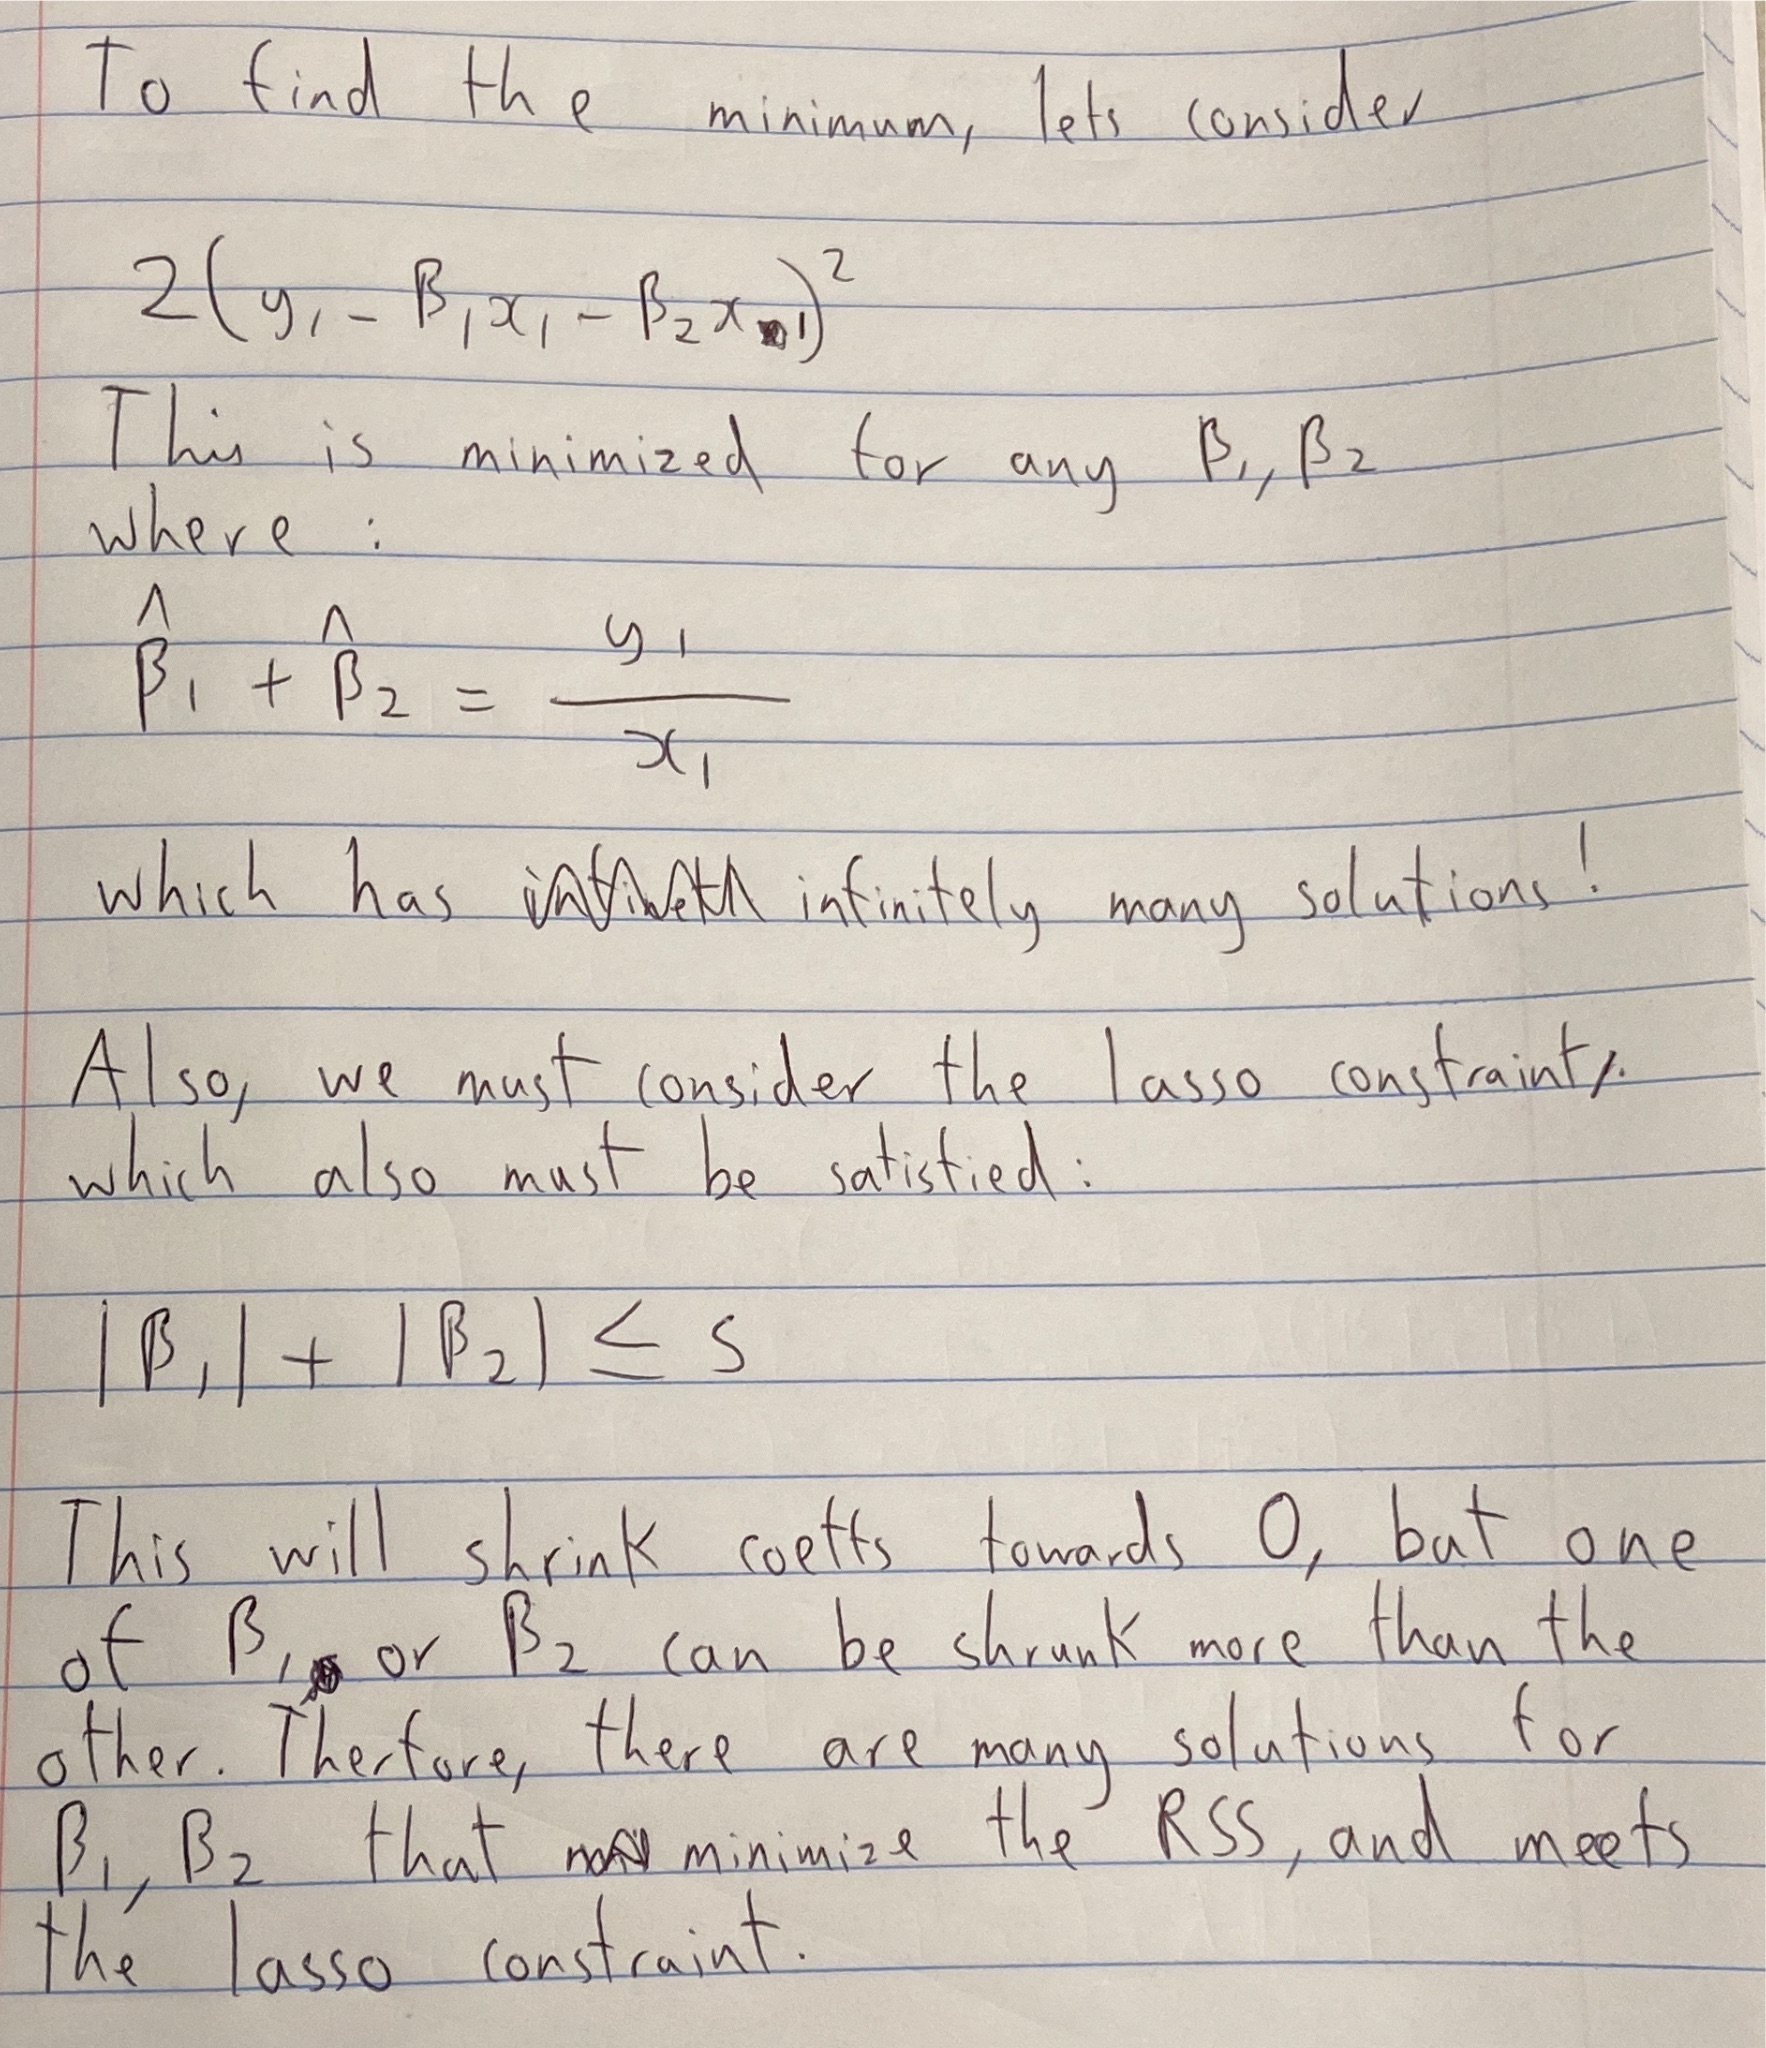

In [31]:
fig = Image(filename=('./ISLR 6.5 5.jpeg'))
fig

## 4. ISLR 8.4.5

Majority vote:

0.1, 0.15, 0.2, 0.2 - Green
0.55, 0.6, 0.6, 0.65, 0.7, 0.75 - Red

4 Green, 6 Red, so the final classification is "Red".


Average probability:

sum(0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7,0.75) / 10 = 0.45

So the final classification is "Green".

## 5. ISLR 9.7.3

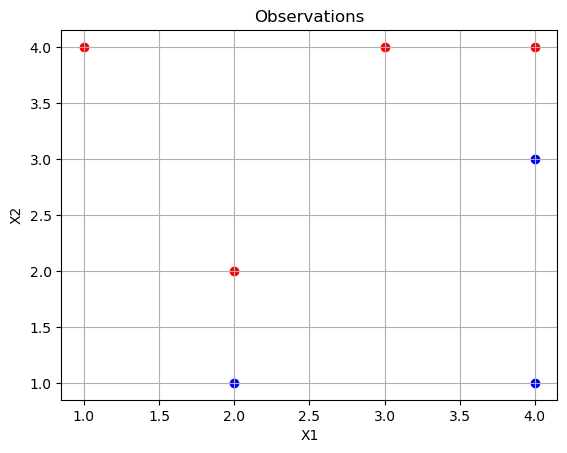

In [32]:
# part a
# Given data points
X = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]])
y = np.array(['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue'])

for i, label in enumerate(y):
    plt.scatter(X[i, 0], X[i, 1], c=label.lower())

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observations')
plt.grid(True)
plt.show()

b. The hyperplane passes through points (2, 1.5) and (4,3.5). It has the following equation:

0.5 - X1 + X2 = 0

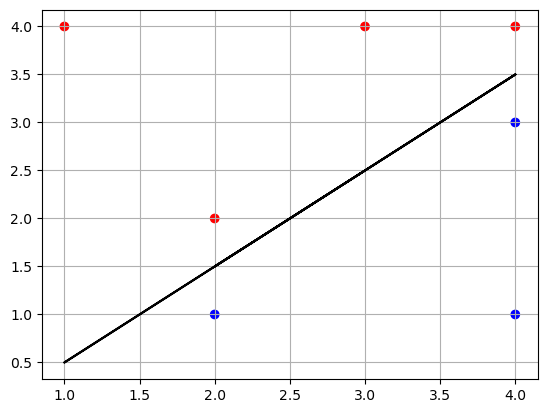

In [33]:
# part b
# Your data points
x1 = np.array([3, 2, 4, 1, 2, 4, 4])
x2 = np.array([4, 2, 4, 4, 1, 3, 1])
colors = ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']  # Y values

plt.plot(x1,np.array(x1)-0.5,color='black')
plt.scatter(x1,x2, c=colors)
plt.grid(True)
plt.show()

c. Classify to "Red" if 0.5 - X1 + X2 > 0 and classify to "Blue" otherwise.

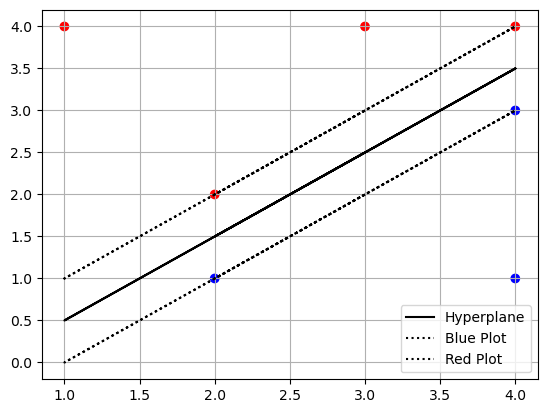

In [34]:
# part d
plt.plot(x1,np.array(x1)-0.5,color='black', label='Hyperplane')
plt.plot(x1,np.array(x1)-1,color='black', label='Blue Plot', linestyle='dotted')
plt.plot(x1,np.array(x1),color='black', linestyle='dotted', label='Red Plot')
plt.scatter(x1,x2, c=colors)
plt.legend(loc='best')
plt.grid(True)
plt.show()

The margin is the perpendicular distance between either of the dotted lines and the solid black line in the middle

e. Support vectors are:
- (2, 2) - Red
- (4, 4) - Red
- (2, 1) - Blue
- (4, 3) - Blue

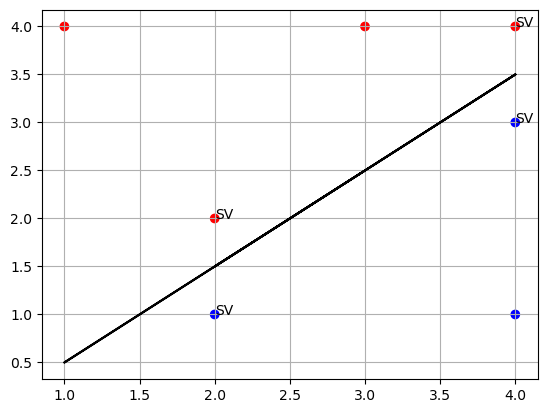

In [35]:
# part e
plt.plot(x1,np.array(x1)-0.5,color='black', label='Hyperplane')
plt.scatter(x1,x2, c=colors)
plt.text(2,2,'SV')
plt.text(2,1,'SV')
plt.text(4,3,'SV')
plt.text(4,4,'SV')
plt.grid(True)
plt.show()

f. We can see from the graph above that a slight movement in the 7th observation which is (4, 1) would not affect the maximal margin hyperplane as it is not a support vector, and relatively far from being one.

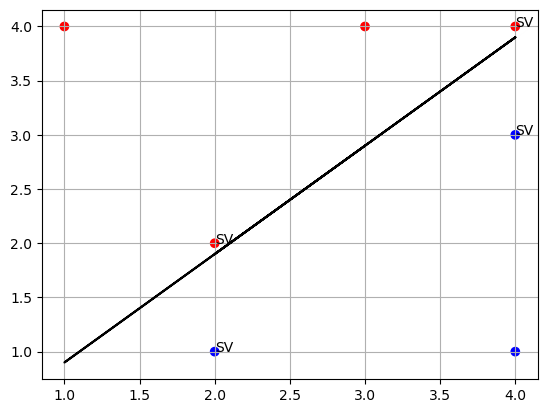

In [36]:
# part g
plt.plot(x1,np.array(x1)-0.1,color='black', label='Hyperplane')
plt.scatter(x1,x2, c=colors)
plt.text(2,2,'SV')
plt.text(2,1,'SV')
plt.text(4,3,'SV')
plt.text(4,4,'SV')
plt.grid(True)
plt.show()

The hyperplane above has equation -0.1 - X1 + X2 = 0 and is not the optimal seperating hyperplane, although it does still seperate the two classes.

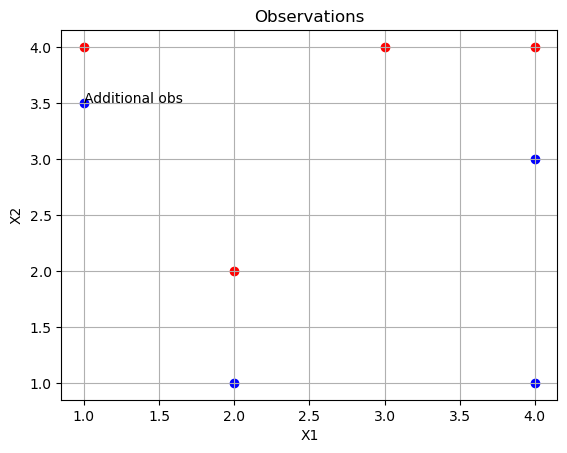

In [37]:
# part h
# Given data points
X = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1], [1, 3.5]])
y = np.array(['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue'])

# Plot the observations
for i, label in enumerate(y):
    plt.scatter(X[i, 0], X[i, 1], c=label.lower())

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observations')
plt.text(1, 3.5,'Additional obs')
plt.grid(True)
plt.show()